In [421]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib

### Exploaring the data

In [176]:
df = pd.read_csv('Car details v3.csv')

In [177]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [178]:
df.shape

(8128, 13)

In [179]:
df.nunique()

name             2058
year               29
selling_price     677
km_driven         921
fuel                4
seller_type         3
transmission        2
owner               5
mileage           393
engine            121
max_power         322
torque            441
seats               9
dtype: int64

In [180]:
df.fuel.value_counts()

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

In [181]:
df.seller_type.value_counts()

Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: seller_type, dtype: int64

In [182]:
df.transmission.value_counts()

Manual       7078
Automatic    1050
Name: transmission, dtype: int64

In [183]:
df.owner.value_counts()

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

In [184]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


### data analysis and preprocessing

In [186]:
df['age'] = 2020 - df['year'] #convert year to age of the car
df.drop('year', axis=1, inplace=True)
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,6
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,6
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,14
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,10
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,13


In [187]:
def convert_mileage_to_num(x):
    x = str(x)
    tokens = x.split(' ') # split the values by ' ' putting them into list
    if len(tokens) == 2:
        return float(tokens[0]) # this will return only the first integer number and ignores the measuring unit
    try:
        return float(x)
    except:
        return None

In [188]:
df['mileage'] = df['mileage'].apply(convert_mileage_to_num)
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,6
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,6
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,14
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,10
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,13


In [189]:
df.mileage.dtypes

dtype('float64')

#### Visuilaize for more understanding the data

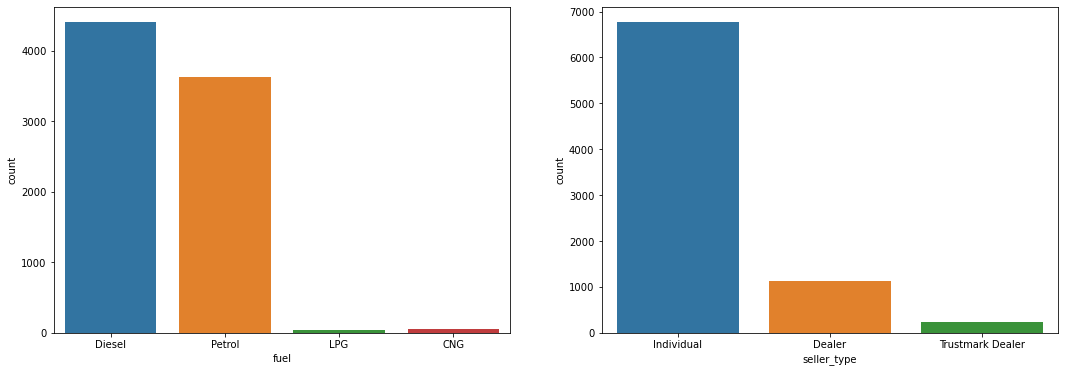

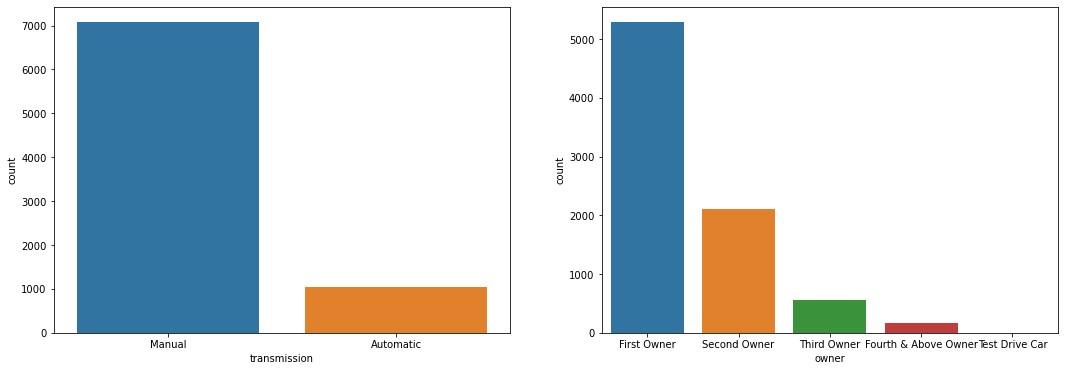

In [190]:
cat_cols = ['fuel','seller_type','transmission','owner']
i=0
while i < 4:
    fig = plt.figure(figsize=[18,6])

    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
    
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
    
    plt.show()

- Diesel and Petrol fuel are the most popluar in the data
- Individual sellers are most popular than other sellers
- Manual Cars are most popular tham automatic cars

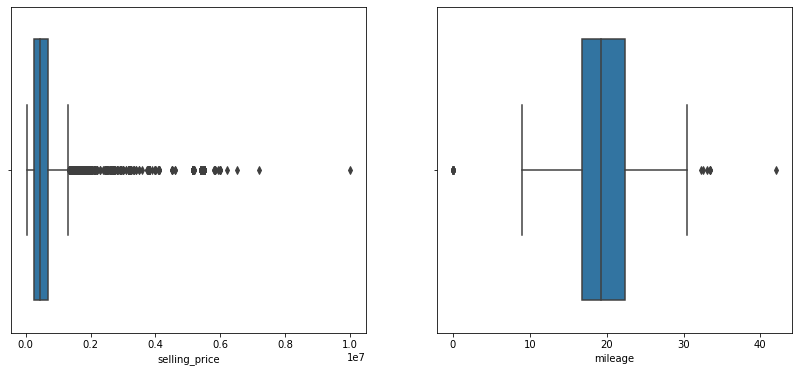

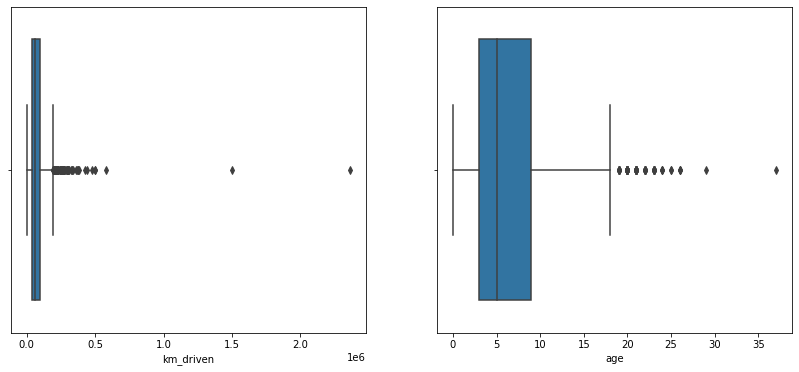

In [191]:
num_cols = ['selling_price','mileage','km_driven','age']
i=0
while i < 4:
    fig = plt.figure(figsize=[14,6])
    
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    
    plt.show()

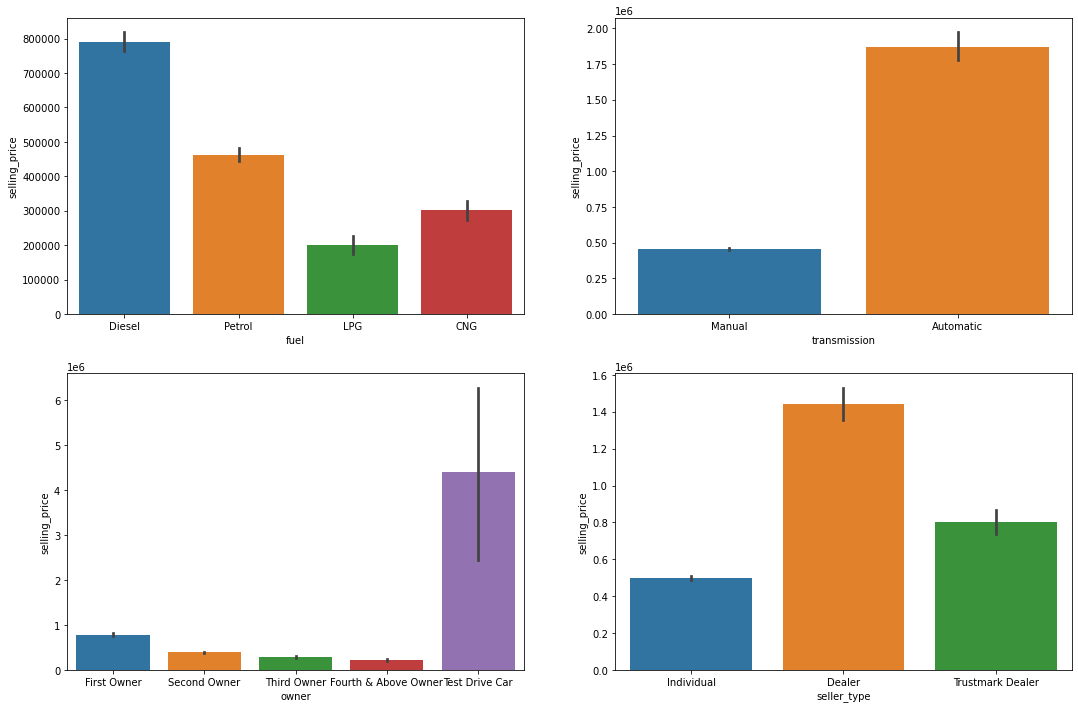

In [192]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
sns.barplot(x='fuel', y='selling_price', data=df);

plt.subplot(2,2,2)
sns.barplot(x='transmission', y='selling_price', data=df)

plt.subplot(2,2,3)
sns.barplot(x='owner', y='selling_price', data=df)

plt.subplot(2,2,4)
sns.barplot(x='seller_type', y='selling_price', data=df)


plt.show()

- price goes higher with Diesel fuel, automatic transmission, Dealer Seller and test Drive Car

In [193]:
df.engine.value_counts()

1248 CC    1017
1197 CC     832
998 CC      453
796 CC      444
2179 CC     389
           ... 
2650 CC       1
2776 CC       1
1950 CC       1
3498 CC       1
1339 CC       1
Name: engine, Length: 121, dtype: int64

In [194]:
def convert_engine_to_num(x):
    x = str(x)
    tokens = x.split(' ') # split the values by ' ' putting them into list
    if len(tokens) == 2:
        return float(tokens[0]) # this will return only the first integer number and ignores the CC
    try:
        return float(x)
    except:
        return None

In [195]:
df.engine = df.engine.apply(convert_engine_to_num)
df.engine.dtypes

dtype('float64')

In [196]:
df[df.selling_price > df.selling_price.quantile(0.99)]

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age
136,Mercedes-Benz S-Class S 350 CDI,6000000,37000,Diesel,Dealer,Automatic,First Owner,13.50,2987.0,254.79 bhp,620Nm@ 1600-2400rpm,5.0,3
139,BMW X4 M Sport X xDrive20d,5800000,7500,Diesel,Dealer,Automatic,First Owner,16.78,1995.0,190 bhp,400Nm@ 1750-2500rpm,5.0,1
148,Mercedes-Benz S-Class S 350 CDI,5850000,47000,Diesel,Dealer,Automatic,First Owner,13.50,2987.0,282 bhp,490Nm@ 1600rpm,5.0,3
170,Volvo XC90 T8 Excellence BSIV,10000000,30000,Petrol,Individual,Automatic,First Owner,42.00,1969.0,400 bhp,640Nm@ 1740rpm,4.0,3
384,BMW X4 M Sport X xDrive20d,5400000,7500,Diesel,Dealer,Automatic,First Owner,16.78,1995.0,190 bhp,400Nm@ 1750-2500rpm,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7596,BMW 6 Series GT 630d Luxury Line,5830000,30000,Diesel,Individual,Automatic,First Owner,17.09,2993.0,261.4 bhp,620Nm@ 2000-2500rpm,4.0,2
7713,Mercedes-Benz S-Class S 350 CDI,6000000,37000,Diesel,Dealer,Automatic,First Owner,13.50,2987.0,254.79 bhp,620Nm@ 1600-2400rpm,5.0,3
7872,BMW X4 M Sport X xDrive20d,5400000,7500,Diesel,Dealer,Automatic,First Owner,16.78,1995.0,190 bhp,400Nm@ 1750-2500rpm,5.0,1
7873,BMW X4 M Sport X xDrive20d,5500000,8500,Diesel,Dealer,Automatic,First Owner,16.78,1995.0,190 bhp,400Nm@ 1750-2500rpm,5.0,1


In [197]:
df.columns[df.isna().any()]

Index(['mileage', 'engine', 'max_power', 'torque', 'seats'], dtype='object')

#### handling null values

In [198]:
df.isnull().sum()

name               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
age                0
dtype: int64

In [199]:
df2 = df.copy()
df2.engine = df2.engine.fillna(0)

In [200]:
df2[df2['engine'] == 0].head(50)

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age
13,Maruti Swift 1.3 VXi,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,0.0,NaN,NaN,NaN,13
31,Fiat Palio 1.2 ELX,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,0.0,NaN,NaN,NaN,17
78,Tata Indica DLS,50000,70000,Diesel,Individual,Manual,First Owner,NaN,0.0,NaN,NaN,NaN,17
87,Maruti Swift VDI BSIV W ABS,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,0.0,NaN,NaN,NaN,5
119,Maruti Swift VDI BSIV,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,0.0,NaN,NaN,NaN,10
138,BMW X1 sDrive 20D xLine,2150000,27000,Diesel,Dealer,Automatic,First Owner,NaN,0.0,NaN,NaN,NaN,3
200,Toyota Etios GD,235000,120000,Diesel,Individual,Manual,First Owner,NaN,0.0,NaN,NaN,NaN,8
206,Maruti Omni E 8 Str STD,40000,90000,Petrol,Individual,Manual,Second Owner,NaN,0.0,NaN,NaN,NaN,17
228,Maruti Swift 1.3 VXi,130000,120000,Petrol,Individual,Manual,Second Owner,NaN,0.0,NaN,NaN,NaN,12
252,Tata Indica DLS,75000,110000,Diesel,Individual,Manual,Second Owner,NaN,0.0,NaN,NaN,NaN,15


- it seems null values are all same rows we can drop them safely

In [201]:
df.shape

(8128, 13)

In [202]:
df.dropna(inplace=True)
df.shape

(7906, 13)

In [203]:
df.head(2)

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74 bhp,190Nm@ 2000rpm,5.0,6
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52 bhp,250Nm@ 1500-2500rpm,5.0,6


In [204]:
df.max_power.value_counts()

74 bhp        377
81.80 bhp     220
88.5 bhp      204
67 bhp        165
46.3 bhp      162
             ... 
60.2 bhp        1
98.79 bhp       1
86 bhp          1
86.79 bhp       1
170.63 bhp      1
Name: max_power, Length: 320, dtype: int64

In [205]:
def convert_max_power_to_num(x):
    x = str(x)
    tokens = x.split(' ') # split the values by ' ' putting them into list
    if len(tokens) == 2:
        return float(tokens[0]) # this will return only the first integer number and ignores the bhp
    try:
        return float(x)
    except:
        return None

In [206]:
df.max_power = df.max_power.apply(convert_max_power_to_num)
df.max_power.dtypes

dtype('float64')

In [207]:
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,6
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,6
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,14
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,10
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,13


In [208]:
df3 = df.copy()

In [209]:
len(df.name.unique())

1982

In [210]:
df3.drop('torque', axis=1, inplace=True) # as an ambigous feature
df3.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,6
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,6
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,14
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,10
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,13


#### replace categorical columns

In [211]:
df3.fuel.unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [212]:
df3.fuel = df3.fuel.replace(to_replace=['Diesel', 'Petrol', 'LPG', 'CNG'], value=[0,1,2,3])
df3.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,Maruti Swift Dzire VDI,450000,145500,0,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,6
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,0,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,6
2,Honda City 2017-2020 EXi,158000,140000,1,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,14
3,Hyundai i20 Sportz Diesel,225000,127000,0,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,10
4,Maruti Swift VXI BSIII,130000,120000,1,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,13


In [213]:
df3.fuel.unique()

array([0, 1, 2, 3], dtype=int64)

In [214]:
df3.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [215]:
df3.seller_type = df3.seller_type.replace(to_replace=['Individual', 'Dealer', 'Trustmark Dealer'], value=[0,1,2])
df3.head(3)

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,Maruti Swift Dzire VDI,450000,145500,0,0,Manual,First Owner,23.40,1248.0,74.00,5.0,6
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,0,0,Manual,Second Owner,21.14,1498.0,103.52,5.0,6
2,Honda City 2017-2020 EXi,158000,140000,1,0,Manual,Third Owner,17.70,1497.0,78.00,5.0,14


In [216]:
df3.seller_type.unique()

array([0, 1, 2], dtype=int64)

In [217]:
df3.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [218]:
df3.transmission = df3.transmission.replace(to_replace=['Manual', 'Automatic'], value=[0,1])
df3.head(3)

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,Maruti Swift Dzire VDI,450000,145500,0,0,0,First Owner,23.40,1248.0,74.00,5.0,6
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,0,0,0,Second Owner,21.14,1498.0,103.52,5.0,6
2,Honda City 2017-2020 EXi,158000,140000,1,0,0,Third Owner,17.70,1497.0,78.00,5.0,14


In [219]:
df3.transmission.unique()

array([0, 1], dtype=int64)

In [220]:
df3.owner.unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [221]:
df3.owner = df3.owner.replace(to_replace=['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner', 'Test Drive Car'],value=[0,1,2,3,4])
df3.head(3)

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,Maruti Swift Dzire VDI,450000,145500,0,0,0,0,23.40,1248.0,74.00,5.0,6
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,0,0,0,1,21.14,1498.0,103.52,5.0,6
2,Honda City 2017-2020 EXi,158000,140000,1,0,0,2,17.70,1497.0,78.00,5.0,14


In [222]:
df3.owner.unique()

array([0, 1, 2, 3, 4], dtype=int64)

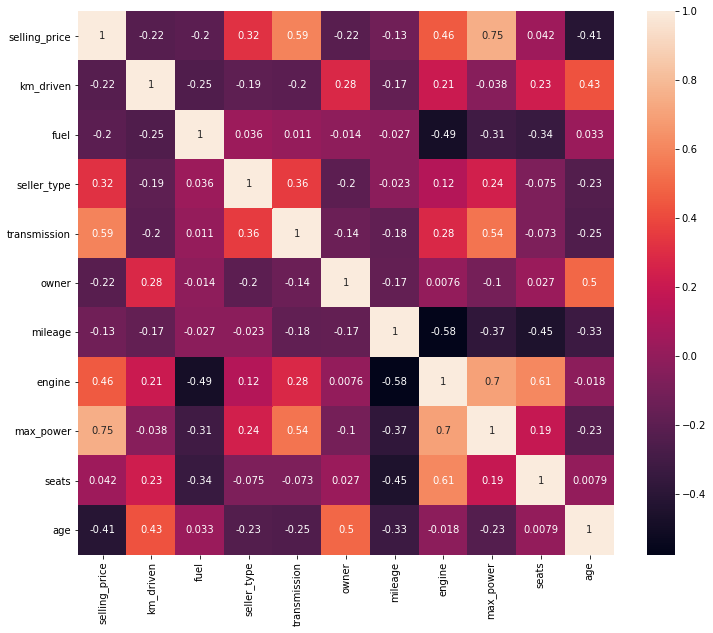

In [223]:
plt.figure(figsize=(12,10))
sns.heatmap(df3.corr(), annot=True);

- max power is highly Postivily correlated with price (75%)
- transmission is Postivily correlated with price (60%)
- car price is also depends on the car brand (name) because each car has it's own features

In [278]:
df3.name = df3.name.apply(lambda x: x.strip())
name_stats = df3['name'].value_counts(ascending=False)
name_stats

other                              3315
Maruti Swift Dzire VDI              129
Maruti Alto 800 LXI                  82
Maruti Alto LXi                      71
BMW X4 M Sport X xDrive20d           62
                                   ... 
Tata Tigor 1.2 Revotron XT            6
Nissan Terrano XL 85 PS               6
Honda City i-DTEC VX                  6
Tata Manza Aura (ABS) Quadrajet       6
Maruti Baleno Delta 1.3               6
Name: name, Length: 317, dtype: int64

Any name having less than 5 data points should be tagged as "other" name. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns 

In [280]:
name_stats_less_than_5 = name_stats[name_stats<=5]

Series([], Name: name, dtype: int64)

In [281]:
df3.name = df3.name.apply(lambda x: 'other' if x in name_stats_less_than_5 else x)
len(df3.name.unique())

317

#### apply one hot encoder

In [282]:
df4 = df3.copy()

In [283]:
dummies = pd.get_dummies(df4.name)
dummies.head()

,Audi Q5 35TDI Premium Plus,BMW 5 Series 520d Sport Line,BMW 6 Series GT 630d Luxury Line,BMW X1 sDrive20d M Sport,BMW X4 M Sport X xDrive20d,Chevrolet Beat Diesel,Chevrolet Beat Diesel LS,Chevrolet Beat Diesel LT,Chevrolet Beat LS,Chevrolet Beat LT,...,Volkswagen Ameo 1.5 TDI Comfortline,Volkswagen Polo 1.2 MPI Comfortline,Volkswagen Polo 1.5 TDI Comfortline,Volkswagen Polo 1.5 TDI Highline,Volkswagen Polo Diesel Highline 1.2L,Volkswagen Vento Diesel Comfortline,Volkswagen Vento Diesel Highline,Volvo V40 D3 R-Design,Volvo XC40 D4 Inscription BSIV,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [284]:
dummies.drop('other', axis=1,inplace=True)
dummies.shape

(7906, 316)

In [285]:
df4 = pd.concat([df3 , dummies], axis=1)
df4.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,...,Toyota Innova Crysta 2.8 ZX AT BSIV,Volkswagen Ameo 1.5 TDI Comfortline,Volkswagen Polo 1.2 MPI Comfortline,Volkswagen Polo 1.5 TDI Comfortline,Volkswagen Polo 1.5 TDI Highline,Volkswagen Polo Diesel Highline 1.2L,Volkswagen Vento Diesel Comfortline,Volkswagen Vento Diesel Highline,Volvo V40 D3 R-Design,Volvo XC40 D4 Inscription BSIV
0,Maruti Swift Dzire VDI,450000,145500,0,0,0,0,23.40,1248.0,74.00,...,0,0,0,0,0,0,0,0,0,0
1,other,370000,120000,0,0,0,1,21.14,1498.0,103.52,...,0,0,0,0,0,0,0,0,0,0
2,Honda City 2017-2020 EXi,158000,140000,1,0,0,2,17.70,1497.0,78.00,...,0,0,0,0,0,0,0,0,0,0
3,other,225000,127000,0,0,0,0,23.00,1396.0,90.00,...,0,0,0,0,0,0,0,0,0,0
4,other,130000,120000,1,0,0,0,16.10,1298.0,88.20,...,0,0,0,0,0,0,0,0,0,0


In [286]:
df4.drop('name', axis=1, inplace=True)
df4.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,...,Toyota Innova Crysta 2.8 ZX AT BSIV,Volkswagen Ameo 1.5 TDI Comfortline,Volkswagen Polo 1.2 MPI Comfortline,Volkswagen Polo 1.5 TDI Comfortline,Volkswagen Polo 1.5 TDI Highline,Volkswagen Polo Diesel Highline 1.2L,Volkswagen Vento Diesel Comfortline,Volkswagen Vento Diesel Highline,Volvo V40 D3 R-Design,Volvo XC40 D4 Inscription BSIV
0,450000,145500,0,0,0,0,23.40,1248.0,74.00,5.0,...,0,0,0,0,0,0,0,0,0,0
1,370000,120000,0,0,0,1,21.14,1498.0,103.52,5.0,...,0,0,0,0,0,0,0,0,0,0
2,158000,140000,1,0,0,2,17.70,1497.0,78.00,5.0,...,0,0,0,0,0,0,0,0,0,0
3,225000,127000,0,0,0,0,23.00,1396.0,90.00,5.0,...,0,0,0,0,0,0,0,0,0,0
4,130000,120000,1,0,0,0,16.10,1298.0,88.20,5.0,...,0,0,0,0,0,0,0,0,0,0


#### Assign feature and target variables

In [287]:
X = df4.drop('selling_price', axis=1)
X.head(3)

,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age,...,Toyota Innova Crysta 2.8 ZX AT BSIV,Volkswagen Ameo 1.5 TDI Comfortline,Volkswagen Polo 1.2 MPI Comfortline,Volkswagen Polo 1.5 TDI Comfortline,Volkswagen Polo 1.5 TDI Highline,Volkswagen Polo Diesel Highline 1.2L,Volkswagen Vento Diesel Comfortline,Volkswagen Vento Diesel Highline,Volvo V40 D3 R-Design,Volvo XC40 D4 Inscription BSIV
0,145500,0,0,0,0,23.40,1248.0,74.00,5.0,6,...,0,0,0,0,0,0,0,0,0,0
1,120000,0,0,0,1,21.14,1498.0,103.52,5.0,6,...,0,0,0,0,0,0,0,0,0,0
2,140000,1,0,0,2,17.70,1497.0,78.00,5.0,14,...,0,0,0,0,0,0,0,0,0,0


In [288]:
y = df4.selling_price

### Splitting the data into Training and Testing data

In [410]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=40)

In [411]:
len(X_train)

5929

In [412]:
len(X_test)

1977

### Bulding and Training the model 

In [413]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Accuracy of the model

In [414]:
model.score(X_test, y_test)

0.9278096348649784

### Save the model

In [422]:
joblib.dump(model, 'Car Price Prediction Model')

['Car Price Prediction Model']